In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("cancer_1.csv",encoding='latin-1')
df.head()

,County,Population,incidenceRate,medIncome,povertyPercent,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PctMarriedHouseholds,...,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,deathRate
0,"Iosco County, Michigan",25345,406.2,37122,19.0,624.0,51.6,52.5,2.20,48.108966,...,12.1,61.4,29.4,53.2,23.4,96.145821,0.625960,0.519665,0.141727,193.4
1,"Mineral County, Montana",4251,538.8,36449,17.3,619.2,52.3,50.7,2.67,46.769034,...,11.8,48.3,20.2,53.8,27.1,98.442662,0.070788,0.165172,0.141576,188.8
2,"Lake County, Oregon",7829,397.2,40328,19.3,579.6,48.2,48.5,2.08,47.560976,...,10.6,54.7,29.9,48.3,25.6,90.283091,0.612089,0.816118,2.384596,139.2
3,"Pittsylvania County, Virginia",62194,399.0,44207,14.6,546.0,44.2,46.7,2.36,51.591360,...,7.7,66.2,42.6,36.2,18.6,74.844730,21.417651,0.342389,1.576584,176.8
4,"Hall County, Texas",3138,415.8,33324,24.5,536.4,42.8,45.2,2.71,51.515152,...,11.5,42.6,20.4,42.7,26.9,81.673431,7.461755,0.312207,6.244146,223.2


In [4]:
df.shape

(3047, 25)

In [5]:
# check duplicate
a=df[df.duplicated()] 
a.shape

(0, 25)

In [6]:
# check is any null value
df.isna().sum()

County                    0
Population                0
incidenceRate             0
medIncome                 0
povertyPercent            0
MedianAge                 0
MedianAgeMale             0
MedianAgeFemale           0
AvgHouseholdSize          0
PctMarriedHouseholds      0
PctNoHS18_24              0
PctHS18_24                0
PctBachDeg18_24           0
PctHS25_Over              0
PctBachDeg25_Over         0
PctUnemployed16_Over      0
PctPrivateCoverage        0
PctEmpPrivCoverage        0
PctPublicCoverage         0
PctPublicCoverageAlone    0
PctWhite                  0
PctBlack                  0
PctAsian                  0
PctOtherRace              0
deathRate                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   County                  3047 non-null   object 
 1   Population              3047 non-null   int64  
 2   incidenceRate           3047 non-null   float64
 3   medIncome               3047 non-null   int64  
 4   povertyPercent          3047 non-null   float64
 5   MedianAge               3047 non-null   float64
 6   MedianAgeMale           3047 non-null   float64
 7   MedianAgeFemale         3047 non-null   float64
 8   AvgHouseholdSize        3047 non-null   float64
 9   PctMarriedHouseholds    3047 non-null   float64
 10  PctNoHS18_24            3047 non-null   float64
 11  PctHS18_24              3047 non-null   float64
 12  PctBachDeg18_24         3047 non-null   float64
 13  PctHS25_Over            3047 non-null   float64
 14  PctBachDeg25_Over       3047 non-null   

In [8]:
df.drop(['County'],axis=1,inplace=True)

In [159]:
# a=df.describe()

## Detection of outliers for Independent Variables :

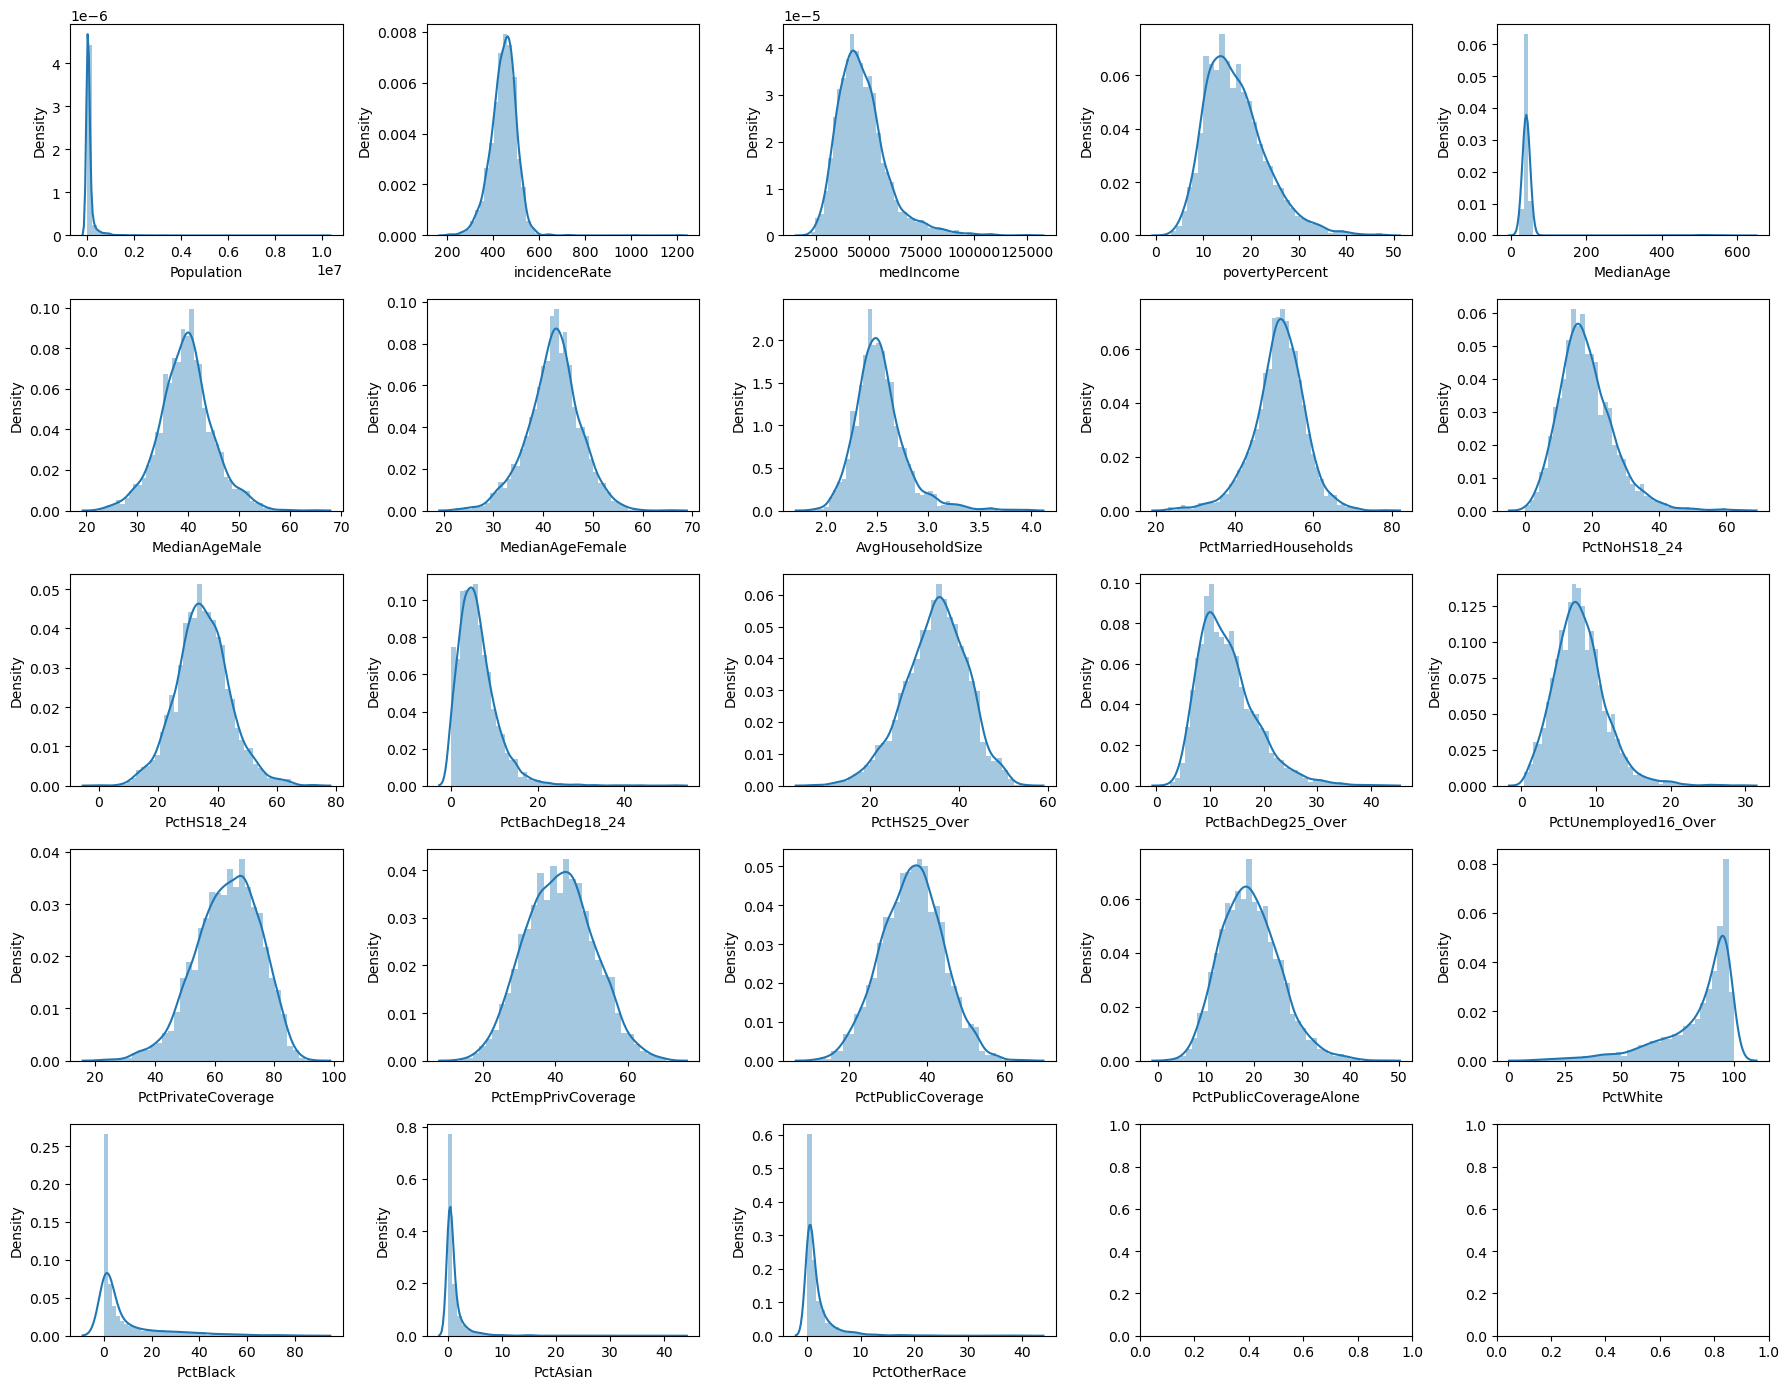

In [9]:
#ploting the Normal distribution:
fig, axes = plt.subplots(5, 5, figsize=(18, 14)) ## define the rows and the columns to be display 
axes = [ax for axes_row in axes for ax in axes_row] ## loop through the row and the columns
for i, c in enumerate(df.columns[:-1]): ## gives all the columns and index in tuple
    plot = sns.distplot(df[c] ,ax=axes[i])
plt.tight_layout()

<AxesSubplot:xlabel='deathRate', ylabel='Density'>

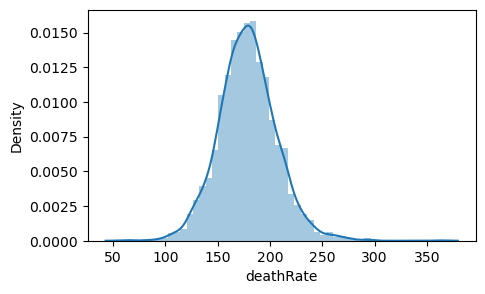

In [10]:
## plot histogram for target variable:
plt.figure(figsize=(5,3))
# df['deathRate'].plot(kind='hist')
sns.distplot(df['deathRate'])

In [11]:
# checking the skewness:
df.skew()

Population                14.289926
incidenceRate              0.750963
medIncome                  1.408071
povertyPercent             0.930713
MedianAge                  9.989944
MedianAgeMale              0.132041
MedianAgeFemale           -0.208384
AvgHouseholdSize           1.297096
PctMarriedHouseholds      -0.522362
PctNoHS18_24               0.973345
PctHS18_24                 0.179209
PctBachDeg18_24            1.956201
PctHS25_Over              -0.333635
PctBachDeg25_Over          1.094837
PctUnemployed16_Over       0.891061
PctPrivateCoverage        -0.393537
PctEmpPrivCoverage         0.089416
PctPublicCoverage         -0.005436
PctPublicCoverageAlone     0.470949
PctWhite                  -1.680904
PctBlack                   2.258068
PctAsian                   7.418041
PctOtherRace               4.952179
deathRate                  0.274724
dtype: float64

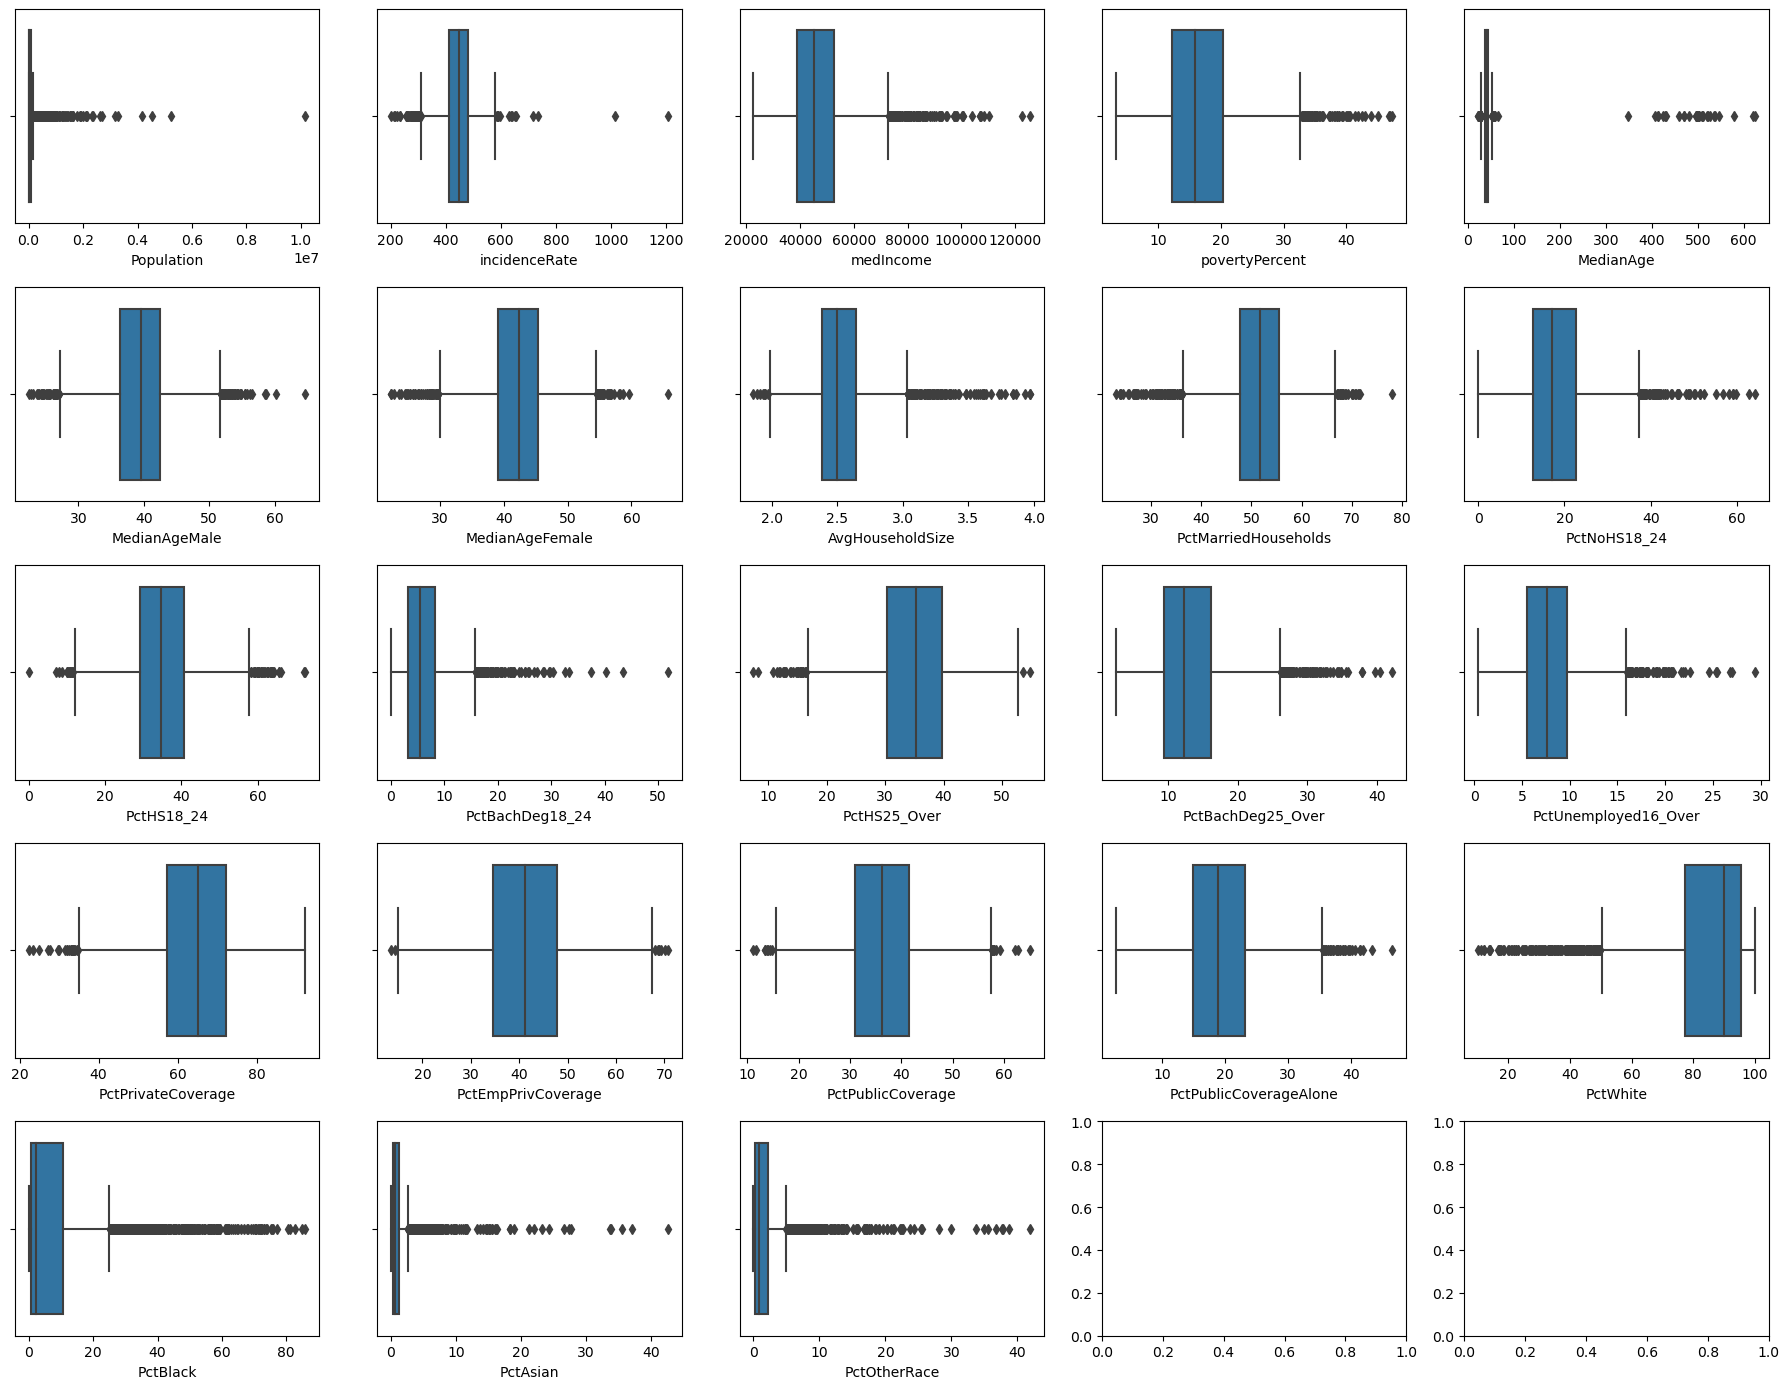

In [12]:
## plot boxplot for all the variables except target variable:
fig, axes = plt.subplots(5, 5, figsize=(18, 14)) ## define the rows and the columns to be display 
axes = [ax for axes_row in axes for ax in axes_row] ## loop through the row and the columns
for i, c in enumerate(df.columns[:-1]): ## gives all the columns and index in tuple
    plot = sns.boxplot(df[c] ,ax=axes[i])
plt.tight_layout()

## Treatment of Outliers using IQR :

In [13]:
df.shape

(3047, 24)

In [14]:
df_trim=df.copy()

In [15]:
features=['Population', 'incidenceRate', 'medIncome', 'povertyPercent',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PctMarriedHouseholds', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace']

In [16]:
def outlier(data,col):
    drop_outliers = np.array([])
    for cols in col:
        Q1 = data[cols].quantile(0.25)
        print(Q1)
        Q3 = data[cols].quantile(0.75)
        IQR = Q3-Q1
        s=data[cols]
        indexes = s[(s<(Q1-1.5*IQR)) | (s>(Q3+1.5*IQR))].index
        drop_outliers=np.append(drop_outliers,indexes)
    return drop_outliers

In [17]:
dropped = outlier(df_trim, features)

11684.0
413.15
38882.5
12.149999999999999
37.7
36.349999999999994
39.1
2.38
47.76306267
12.8
29.2
3.1
30.4
9.4
5.5
57.2
34.5
30.9
14.850000000000001
77.29617993
0.6206746974999999
0.254199086
0.295172042


In [18]:
df.drop(dropped, inplace=True)
df.shape

(1705, 24)

In [19]:
df.skew()

Population                1.573888
incidenceRate            -0.233523
medIncome                 0.467059
povertyPercent            0.521794
MedianAge                -0.084635
MedianAgeMale             0.032772
MedianAgeFemale          -0.201785
AvgHouseholdSize          0.271484
PctMarriedHouseholds      0.049788
PctNoHS18_24              0.370201
PctHS18_24               -0.101152
PctBachDeg18_24           0.559955
PctHS25_Over              0.021837
PctBachDeg25_Over         0.563190
PctUnemployed16_Over      0.113435
PctPrivateCoverage       -0.212441
PctEmpPrivCoverage       -0.021370
PctPublicCoverage         0.093427
PctPublicCoverageAlone    0.290749
PctWhite                 -1.692672
PctBlack                  2.148722
PctAsian                  1.580736
PctOtherRace              1.629122
deathRate                 0.151786
dtype: float64

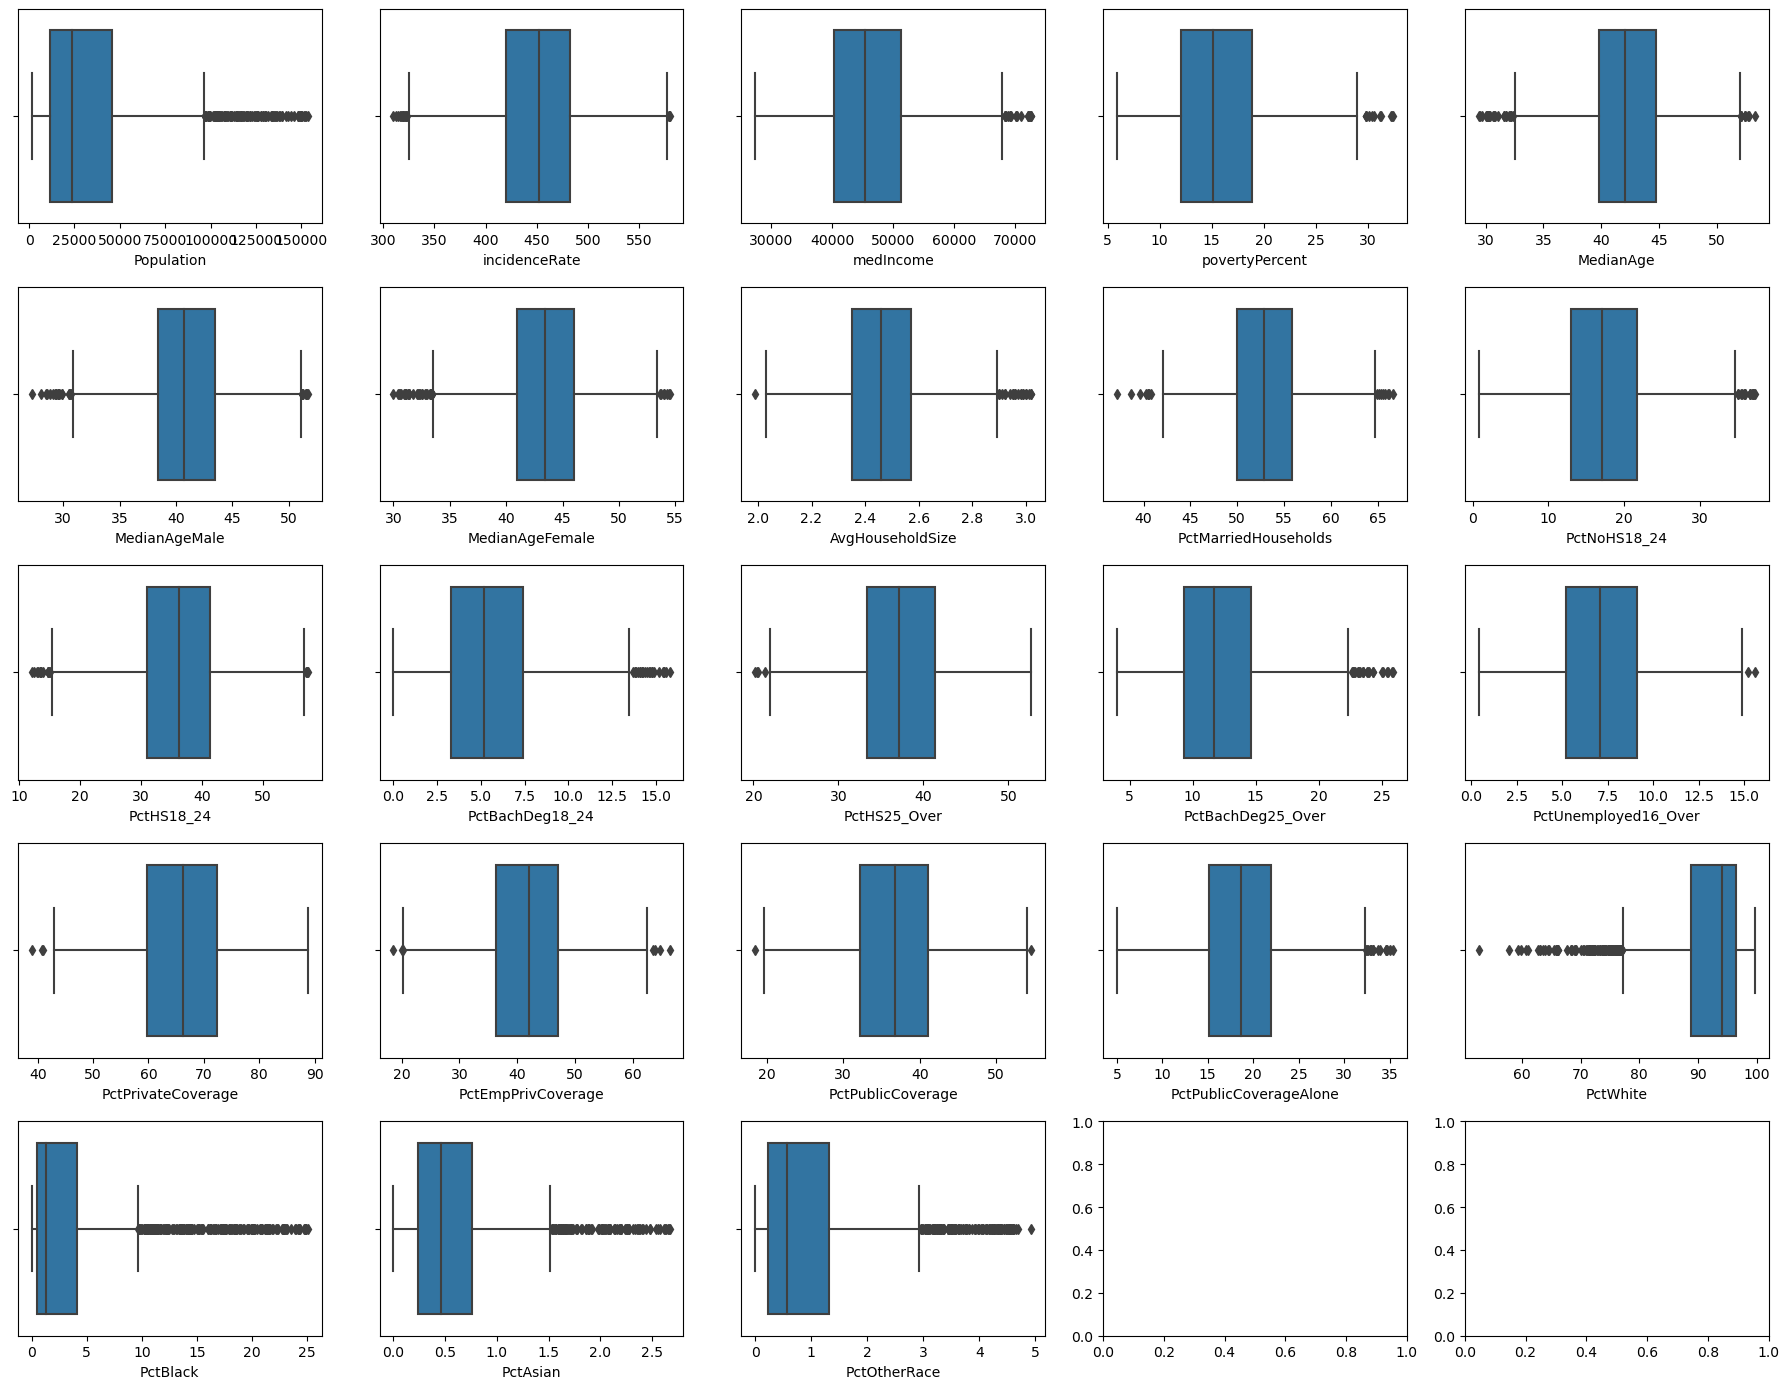

In [20]:
#plot boxplot for all the variables except target variable after removing the outlier:
fig, axes = plt.subplots(5, 5, figsize=(18, 14)) ## define the rows and the columns to be display 
axes = [ax for axes_row in axes for ax in axes_row] ## loop through the row and the columns
for i, c in enumerate(df.columns[:-1]): ## gives all the columns and index in tuple
    plot = sns.boxplot(df[c] ,ax=axes[i])
plt.tight_layout()

## Feature Selection using Correlation :

In [173]:
df.shape

(1705, 24)

In [21]:
df.corr().round(2)

,Population,incidenceRate,medIncome,povertyPercent,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PctMarriedHouseholds,PctNoHS18_24,...,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,deathRate
Population,1.00,0.18,0.17,-0.02,-0.33,-0.32,-0.33,0.24,-0.22,-0.21,...,0.22,0.06,0.25,-0.14,-0.02,-0.22,0.23,0.47,0.14,0.03
incidenceRate,0.18,1.00,-0.05,0.10,-0.06,-0.06,-0.07,0.02,-0.15,-0.12,...,0.20,-0.03,0.08,0.10,0.14,0.02,0.06,0.02,-0.14,0.46
medIncome,0.17,-0.05,1.00,-0.86,-0.13,-0.10,-0.16,0.07,0.41,-0.19,...,-0.49,0.77,0.72,-0.75,-0.75,0.12,-0.12,0.24,0.05,-0.45
povertyPercent,-0.02,0.10,-0.86,1.00,-0.11,-0.12,-0.08,0.15,-0.43,0.19,...,0.61,-0.84,-0.67,0.67,0.78,-0.30,0.28,-0.11,0.05,0.50
MedianAge,-0.33,-0.06,-0.13,-0.11,1.00,0.98,0.98,-0.59,0.13,0.12,...,-0.05,-0.01,-0.33,0.44,0.09,0.33,-0.26,-0.30,-0.26,-0.10
MedianAgeMale,-0.32,-0.06,-0.10,-0.12,0.98,1.00,0.92,-0.55,0.15,0.12,...,-0.04,-0.01,-0.31,0.42,0.08,0.34,-0.28,-0.28,-0.26,-0.10
MedianAgeFemale,-0.33,-0.07,-0.16,-0.08,0.98,0.92,1.00,-0.61,0.09,0.14,...,-0.05,-0.02,-0.34,0.46,0.10,0.30,-0.23,-0.30,-0.24,-0.10
AvgHouseholdSize,0.24,0.02,0.07,0.15,-0.59,-0.55,-0.61,1.00,0.21,0.17,...,0.29,-0.26,0.07,-0.20,0.10,-0.35,0.32,0.11,0.30,0.18
PctMarriedHouseholds,-0.22,-0.15,0.41,-0.43,0.13,0.15,0.09,0.21,1.00,0.08,...,-0.29,0.35,0.25,-0.34,-0.38,0.30,-0.23,-0.19,-0.05,-0.24
PctNoHS18_24,-0.21,-0.12,-0.19,0.19,0.12,0.12,0.14,0.17,0.08,1.00,...,0.13,-0.33,-0.32,0.20,0.19,-0.13,0.06,-0.21,0.14,0.05


<AxesSubplot:>

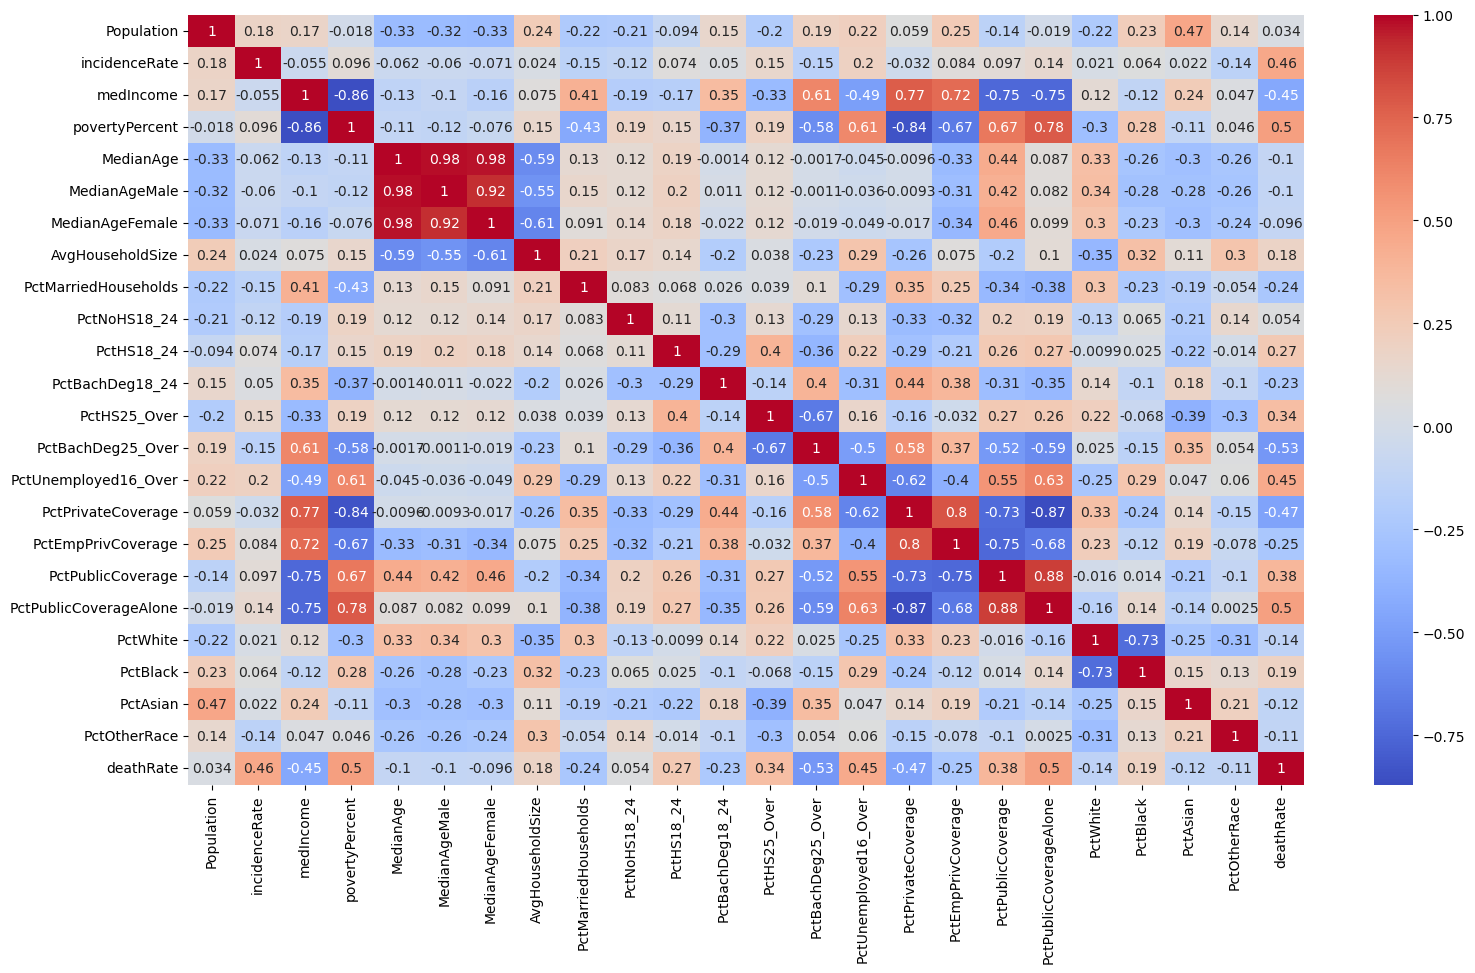

In [22]:
# display correlation matrix using heatmap:
corr=df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [23]:
## selecting features on base of correlation cuttoff :
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [24]:
corr_features=correlation(df,0.8)
len(set(corr_features))

6

In [25]:
corr_features

{'MedianAgeFemale',
 'MedianAgeMale',
 'PctEmpPrivCoverage',
 'PctPrivateCoverage',
 'PctPublicCoverageAlone',
 'povertyPercent'}

In [179]:
df.drop(labels=corr_features, axis=1, inplace=True)
df.shape

(1705, 18)

## Feature Selection using P-Value:

In [26]:
import statsmodels.api as sm

In [27]:
df.shape

(1705, 24)

In [28]:
x=df.drop(['deathRate'],axis=1)
y=df['deathRate']

In [29]:
features=['Population', 'incidenceRate', 'medIncome', 'povertyPercent',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PctMarriedHouseholds', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace']

In [30]:
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              deathRate   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     80.29
Date:                Sun, 26 Mar 2023   Prob (F-statistic):          1.42e-250
Time:                        21:13:03   Log-Likelihood:                -7257.4
No. Observations:                1705   AIC:                         1.456e+04
Df Residuals:                    1681   BIC:                         1.469e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    154.4438     24.653      6.265      0.000     106.089     202.798
Population             -2.041e-05   1.75e-05     -1.164      0.245   -5.48e-05     1.4e-05
incidenceRate              0.1821      0.009     19.243      0.000       0.164       0.201
medIncome              -3.373e-05      0.000     -0.242      0.809      -0.000       0.000
povertyPercent             0.8581      0.248      3.465      0.001       0.372       1.344
MedianAge                  3.4468      1.416      2.433      0.015       0.669       6.225
MedianAgeMale             -2.0846      0.801     -2.604      0.009      -3.655      -0.514
MedianAgeFemale           -1.5373      0.741     -2.074      0.038      -2.991      -0.084
AvgHouseholdSize          -1.1219      4.747     -0.236      0.813     -10.433       8.189
PctMarriedHouseholds      -0.1503      0.141     -1.064      0.288      -0.427       0.127
PctNoHS18_24              -0.1533      0.075     -2.038      0.042      -0.301      -0.006
PctHS18_24                 0.2637      0.063      4.183      0.000       0.140       0.387
PctBachDeg18_24           -0.1112      0.164     -0.677      0.498      -0.433       0.211
PctHS25_Over               0.0650      0.124      0.526      0.599      -0.178       0.308
PctBachDeg25_Over         -1.3944      0.216     -6.464      0.000      -1.817      -0.971
PctUnemployed16_Over       0.3729      0.236      1.583      0.114      -0.089       0.835
PctPrivateCoverage        -0.5869      0.194     -3.022      0.003      -0.968      -0.206
PctEmpPrivCoverage         0.4199      0.142      2.949      0.003       0.141       0.699
PctPublicCoverage         -0.3312      0.288     -1.152      0.249      -0.895       0.233
PctPublicCoverageAlone     0.5136      0.368      1.397      0.162      -0.207       1.235
PctWhite                  -0.1871      0.101     -1.857      0.063      -0.385       0.011
PctBlack                   0.0062      0.126      0.049      0.961      -0.240       0.252
PctAsian                  -0.3605      1.068     -0.338      0.736      -2.455       1.734
PctOtherRace              -2.2696      0.465     -4.886      0.000      -3.181      -1.358
==============================================================================
Omnibus:                       26.609   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.728
Skew:                          -0.086   Prob(JB):                     1.18e-10
Kurtosis:                       3.784   Cond. No.                     3.67e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+06. This mi

In [33]:
dfp=df[['incidenceRate',
 'povertyPercent',
 'MedianAge',
 'MedianAgeMale',
 'MedianAgeFemale',
 'PctNoHS18_24',
 'PctHS18_24',
 'PctBachDeg25_Over',
 'PctPrivateCoverage',
 'PctEmpPrivCoverage',
 'PctOtherRace',
 'deathRate']]
dfp.shape

(1705, 12)

## Build the MultiLinear Regression Model :

In [32]:
df.shape

(1705, 24)

In [34]:
x=dfp.drop(['deathRate'],axis=1)
y=dfp['deathRate']

In [35]:
# split data into train and test in ratio of 80:20:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1364, 11) (1364,)
(341, 11) (341,)


In [36]:
# scaling train data using minmax scalar
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [37]:
lrm=LinearRegression()
lrm_model=lrm.fit(x_train,y_train)
y_pred=lrm.predict(x_test)

In [38]:
lrm_model.score(x_test,y_test)

0.5280181688613423

In [58]:
y_pred = lrm_model.predict(x_test)
residual = y_test - y_pred
residual

409     -8.780603
80      -8.986381
366    -15.948913
2066   -12.512143
1500    21.973722
          ...    
2248    12.728197
492     11.814128
849    -12.493177
304    -14.812136
1717    -4.551057
Name: deathRate, Length: 341, dtype: float64

In [60]:
import scipy.stats as stats
test_statistic, p_value = stats.shapiro(residual)

In [61]:
p_value

0.0061462149024009705

Text(0.5, 1.0, 'Residual')

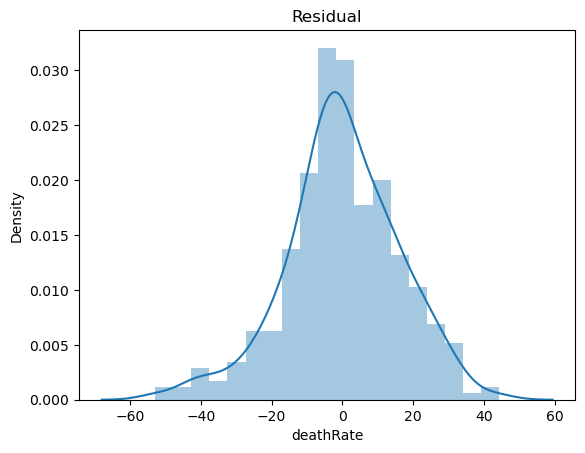

In [65]:
sns.distplot(residual)
plt.title('Residual')

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("MSE",r2_score(y_test,y_pred))
# r2 = r2_score(y_test,y_pred)

MAE 12.2235085211232
MSE 257.0839225416766
RMSE 16.03383680039424
MSE 0.5280181688613423


<function matplotlib.pyplot.show(close=None, block=None)>

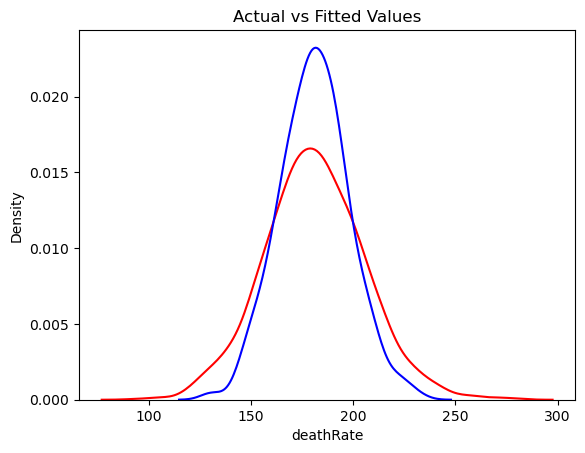

In [40]:
ax1 = sns.distplot(df['deathRate'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values')
plt.show

## Fit the OLS model :

In [41]:
x_1=sm.add_constant(x)
model = sm.OLS(y,x_1).fit()
p = model.params
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              deathRate   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     166.3
Date:                Sun, 26 Mar 2023   Prob (F-statistic):          6.67e-260
Time:                        21:15:37   Log-Likelihood:                -7264.7
No. Observations:                1705   AIC:                         1.455e+04
Df Residuals:                    1693   BIC:                         1.462e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                142.3310     12

## Assumptions:

## 1. Normal Q-Q plot 

In [42]:
residual = y_test - y_pred

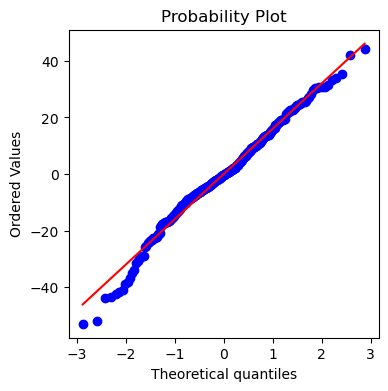

In [43]:
import scipy as sp
fig, ax = plt.subplots(figsize=(4,4))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

## 2. Variance Inflation Factor (VIF)

In [44]:
dfx.shape

(1705, 12)

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def compute_vif(considered_features):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [46]:
# features to consider removing
considered_features = ['Population', 'incidenceRate', 'medIncome', 'povertyPercent',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PctMarriedHouseholds', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace']
# compute vif 
# compute_vif(considered_features).sort_values('VIF', ascending=False)

In [66]:
considered_features.remove('PctPublicCoverage')
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
2,povertyPercent,3.891392
10,PctBachDeg25_Over,3.854447
12,PctEmpPrivCoverage,3.323969
13,PctWhite,2.986439
3,MedianAgeMale,2.715261
9,PctHS25_Over,2.715021
4,AvgHouseholdSize,2.703995
14,PctBlack,2.379421
11,PctUnemployed16_Over,2.283788
5,PctMarriedHouseholds,1.925322


## 3.Cook's Distance plot

In [52]:
X_with_constant = sm.add_constant(x_train)
model = sm.OLS(y_train, X_with_constant).fit()
influence = model.get_influence()
cd, _ = influence.cooks_distance

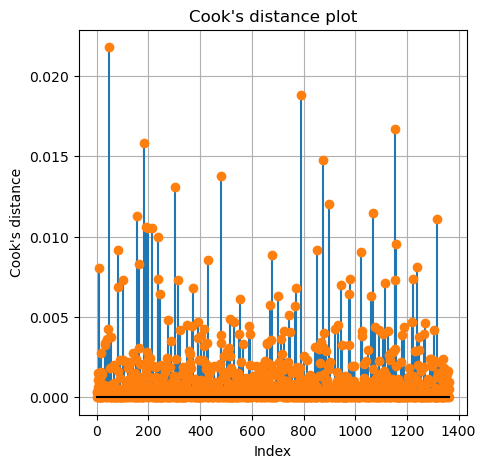

In [53]:
fig, ax = plt.subplots(figsize=(5,5))
ax.stem(cd, linefmt='C0-', markerfmt='C1o', basefmt='k-')
ax.set_title("Cook's distance plot")
ax.set_xlabel('Index')
ax.set_ylabel("Cook's distance")
ax.grid(True)
plt.show()

## 4.Durbin Watson Test

In [54]:
dw = sm.stats.stattools.durbin_watson(model.resid)
print("Durbin-Watson statistic:", dw)

Durbin-Watson statistic: 1.9011626084838993


## 5. Non Constant Variance Test 

<AxesSubplot:xlabel='deathRate'>

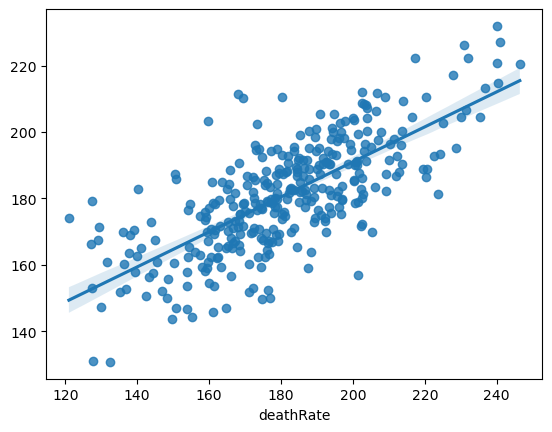

In [55]:
sns.regplot(y_test,y_pred)